In [12]:
import pickle
import pandas as pd
import numpy as np
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
# file_to_read = open("twm_store_page55_79.pickle", "rb")

# data = pickle.load(file_to_read)

# df1=pd.DataFrame(data)
# df2=pd.read_csv('data_combined.csv')
# df=pd.concat([df1,df2])
# df.to_csv('full_data_TWM.csv', index=False)

In [14]:
df=pd.read_csv('full_data_TWM.csv')

In [15]:
df=df.replace('',np.nan)

In [16]:
df['Cons']=df['Cons'].replace('Suitable Cons could not be generated at this time.',np.nan)

In [17]:
grp_data=pd.read_csv('product_sentiment.csv')

In [18]:
df=pd.merge(df, grp_data, on='Product name', how='left')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1696
Columns: 546 entries, Product name to 511
dtypes: float64(527), int64(6), object(13)
memory usage: 7.1+ MB


In [20]:
for i in range(df.shape[0]):
    percent=df.loc[i,'recommendation_percent']
    try:
        if(percent[-1]=='%'):
            df.loc[i,'recommendation_percent']=int(df.loc[i,'recommendation_percent'][:2])
        else:
            df.loc[i,'recommendation_percent']=int(df.loc[i,'recommendation_percent'])
    except:
        df.loc[i,'recommendation_percent']=np.nan
        
df['recommendation_percent']=df['recommendation_percent'].astype(float)

In [21]:
df.describe()

,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Similar_product_price_1,Similar_product_price_2,...,502,503,504,505,506,507,508,509,510,511
count,1697.000000,1690.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1528.000000,1282.000000,...,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,70.780943,4.391302,139.015321,3.345315,2.794343,8.050678,25.047142,99.777843,41.846950,40.772356,...,-0.041860,-0.033492,0.025333,-0.032011,-0.012568,-0.019610,0.041837,0.005905,-0.036827,0.003254
std,297.370246,0.548631,558.294245,8.369829,8.456926,35.454792,100.402493,411.746577,24.108234,23.355653,...,0.029133,0.042110,0.033357,0.033889,0.038031,0.036165,0.028316,0.033510,0.028849,0.038407
min,0.790000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.990000,9.990000,...,-0.103517,-0.152394,-0.077306,-0.084358,-0.092454,-0.083429,-0.087034,-0.078539,-0.085021,-0.101154
25%,19.490000,4.100000,6.000000,0.000000,0.000000,0.000000,1.000000,4.000000,19.990000,19.990000,...,-0.059523,-0.060936,0.002212,-0.053917,-0.045434,-0.049311,0.033365,-0.020522,-0.054988,-0.027926
50%,34.990000,4.500000,21.000000,1.000000,1.000000,1.000000,3.000000,13.000000,34.990000,34.990000,...,-0.050822,-0.052538,0.033737,-0.047663,-0.019029,-0.029115,0.051447,0.009779,-0.048592,0.006425
75%,59.990000,4.700000,70.000000,3.000000,2.000000,4.000000,13.000000,45.000000,54.990000,52.990000,...,-0.031546,-0.004319,0.049562,-0.015708,0.017270,0.002799,0.058931,0.034680,-0.027182,0.036583
max,5999.900000,5.000000,7302.000000,87.000000,107.000000,488.000000,1349.000000,5290.000000,99.990000,99.990000,...,0.066335,0.085888,0.108483,0.084785,0.090100,0.090315,0.097594,0.086715,0.093664,0.080232


In [22]:
df.isnull().sum()

Product name        0
Price_per_unit      0
Rating              7
Rating_count        0
1 star count        0
                 ... 
507               230
508               230
509               230
510               230
511               230
Length: 546, dtype: int64

In [25]:
df[['recommendation_percent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1696
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   recommendation_percent  1191 non-null   float64
dtypes: float64(1)
memory usage: 91.1 KB


In [26]:
df['avg_rating']=(df['5 star count']*5+df['4 star count']*4+df['3 star count']*3+df['2 star count']*2+df['1 star count']*1)/df['Rating_count']

df['avg_rating']=round(df['avg_rating'],1)

df['Rating'].fillna(df['avg_rating'], inplace=True)

df.drop(['avg_rating'], axis=1, inplace=True)

df=df.drop(df[df['Rating_count']==0].index).reset_index(drop=True)

In [27]:
df['1star_percent']=df['1 star count']/df['Rating_count']

df['2star_percent']=df['2 star count']/df['Rating_count']
df['3star_percent']=df['3 star count']/df['Rating_count']
df['4star_percent']=df['4 star count']/df['Rating_count']
df['5star_percent']=df['5 star count']/df['Rating_count']

In [28]:
df.drop(['product recommendation'], axis=1, inplace=True)

In [29]:
for i in range(df.shape[0]):
    try:
        pros_list=list(json.loads(df.loc[i,'Pros'].replace("'", "\"")).values())
        pros_sum=0
        for pros_count in pros_list:
            pros_sum=pros_sum+int(pros_count[:-8])
        df.loc[i,'pros_count']=pros_sum
    except:
        continue
        
df['pros_count']=df['pros_count'].astype(float)

In [30]:
for i in range(df.shape[0]):
    try:
        cons_list=list(json.loads(df.loc[i,'Cons'].replace("'", "\"")).values())
        cons_sum=0
        for cons_count in cons_list:
            cons_sum=cons_sum+int(cons_count[:-8])
        df.loc[i,'cons_count']=cons_sum
    except:
        continue
        
df['cons_count']=df['cons_count'].astype(float)

In [31]:
# df.drop(['Similar_product_1', 'Similar_product_price_1', 'Similar_product_2',
#        'Similar_product_price_2', 'Similar_product_3',
#        'Similar_product_price_3', 'Similar_product_4',
#        'Similar_product_price_4', 'Similar_product_5',
#        'Similar_product_price_5'], axis=1, inplace=True)

In [32]:
bins = [ 0, 1, 2, 3, 4, 5 ]
labels=['0-1 star','1-2 star','2-3 star','3-4 star', '4-5 star']
df['rating_bin'] = pd.cut(df['Rating'] , bins=bins, labels=labels, include_lowest=True)

In [33]:
df['rating_bin'].value_counts()

4-5 star    1328
3-4 star     304
2-3 star      47
1-2 star       8
0-1 star       7
Name: rating_bin, dtype: int64

In [34]:
bins = np.linspace(df['Price_per_unit'].min(),df['Price_per_unit'].max(),4)
labels=["Low price ($0.79-$22.99) USD","Medium price ($23.19-$49.99) USD", "High price ($50.99-$5999.90) USD"]
df['Price_category'] = pd.qcut(df['Price_per_unit'], q=3, precision=1, labels=labels)

In [35]:
df.columns

Index(['Product name', 'Price_per_unit', 'Rating', 'Rating_count',
       '1 star count', '2 star count', '3 star count', '4 star count',
       '5 star count', 'Similar_product_1',
       ...
       '511', '1star_percent', '2star_percent', '3star_percent',
       '4star_percent', '5star_percent', 'pros_count', 'cons_count',
       'rating_bin', 'Price_category'],
      dtype='object', length=554)

In [25]:
for i in list(df.dropna(subset=['Pros']).index):
    pros_list=list(json.loads(df.loc[i,'Pros'].replace("'", "\"")).keys())
    df.loc[i,'Pros1']=pros_list[0]

In [26]:
for i in list(df.dropna(subset=['Cons']).index):
    cons_list=list(json.loads(df.loc[i,'Cons'].replace("'", "\"")).keys())
    df.loc[i,'Cons1']=cons_list[0]

In [27]:
df.to_csv('Modelling_data.csv', index=False)

In [28]:
df.shape

(1694, 556)

In [29]:
df.groupby('Price_category').min()['Price_per_unit']

<ipython-input-29-99bcfdcda737>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby('Price_category').min()['Price_per_unit']


Price_category
Low price ($0.79-$22.99) USD         0.79
Medium price ($23.19-$49.99) USD    23.19
High price ($50.99-$5999.90) USD    50.99
Name: Price_per_unit, dtype: float64

In [30]:
df.groupby('Price_category').max()['Price_per_unit']

<ipython-input-30-f64a19683a85>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby('Price_category').max()['Price_per_unit']


Price_category
Low price ($0.79-$22.99) USD          22.99
Medium price ($23.19-$49.99) USD      49.99
High price ($50.99-$5999.90) USD    5999.90
Name: Price_per_unit, dtype: float64

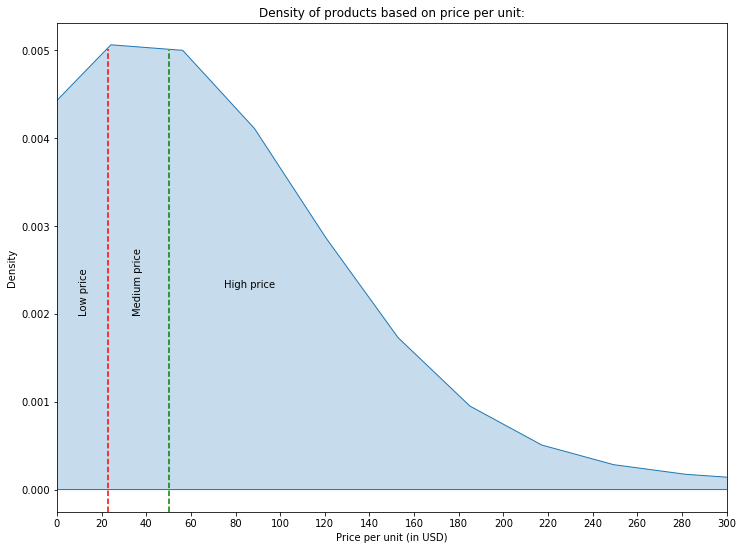

In [31]:
fig,ax =plt.subplots(figsize=(12,9))
plt.xlim(0,300)
plt.title('Density of products based on price per unit:')
plt.xlabel('Price per unit (in USD)')
plt.ylabel('Density')
plt.xticks(np.arange(0, 320, 20))
plt.axvline(x=22.99, ymin=0, ymax=0.945, color='r', ls='--', lw=1.5, label='axvline - % of full height')
plt.text(10.1,0.002,'Low price',rotation=90)
plt.axvline(x=49.99, ymin=0,  ymax=0.9445, color='g', ls='--', lw=1.5, label='axvline - % of full height')
plt.text(34,0.002,'Medium price',rotation=90)
plt.text(75,0.0023,'High price')
sns.kdeplot(df['Price_per_unit'],shade=True)
plt.show()

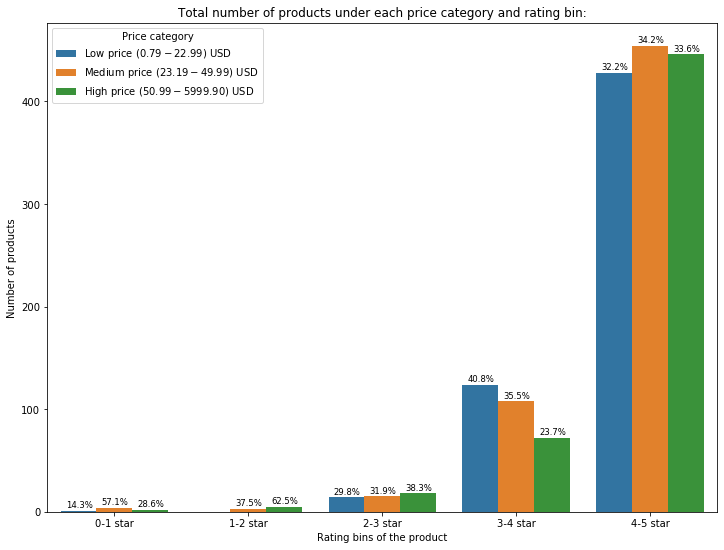

In [32]:
#b=pd.DataFrame(df[['BEER_SALES','WINE_SALES','SPIRITS_SALES','OTHERS_SALES']].sum(),columns=['Total sales'])
fig,ax =plt.subplots(figsize=(12,9))
sns.countplot(x=df['rating_bin'], hue=df['Price_category'])
plt.title('Total number of products under each price category and rating bin:')
plt.xlabel('Rating bins of the product')
plt.ylabel('Number of products')

li=[]
for p in ax.patches:
    li.append(p.get_height())
li=np.array(li)
li[np.isnan(li)] = 0
    
s=[]
s.append(li[0]+li[5]+li[10])
s.append(li[1]+li[6]+li[11])
s.append(li[2]+li[7]+li[12])
s.append(li[3]+li[8]+li[13])
s.append(li[4]+li[9]+li[14])
c=-1
for p in ax.patches:
    c=c+1
    if(c==5):
        c=0
    ax.annotate('{:.01f}%'.format(p.get_height()/s[c]*100), (p.get_x()+0.04, p.get_height()+3), fontsize=8.5)
    
plt.legend( title='Price category', loc='upper left')
plt.show()


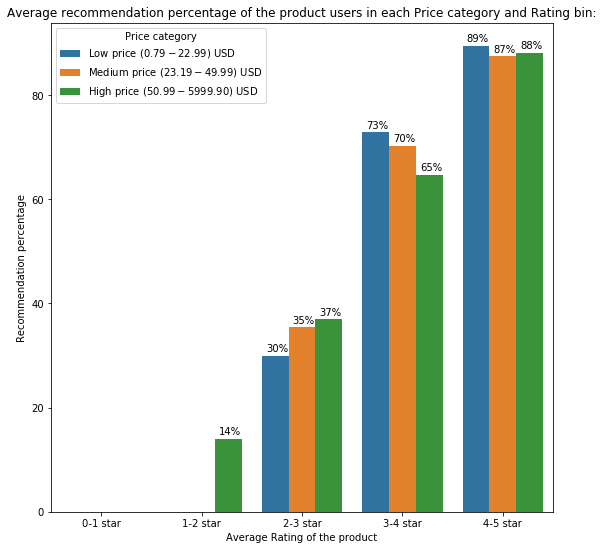

In [33]:
fig,ax =plt.subplots(figsize=(9,9))
sns.barplot(data = df, y='recommendation_percent',x='rating_bin', hue='Price_category' , ci=None)
plt.title('Average recommendation percentage of the product users in each Price category and Rating bin:')
plt.xlabel('Average Rating of the product')
plt.ylabel('Recommendation percentage')

for p in ax.patches:
    ax.annotate('{:.00f}%'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+0.8))


plt.legend( title='Price category', loc='upper left')
plt.show()


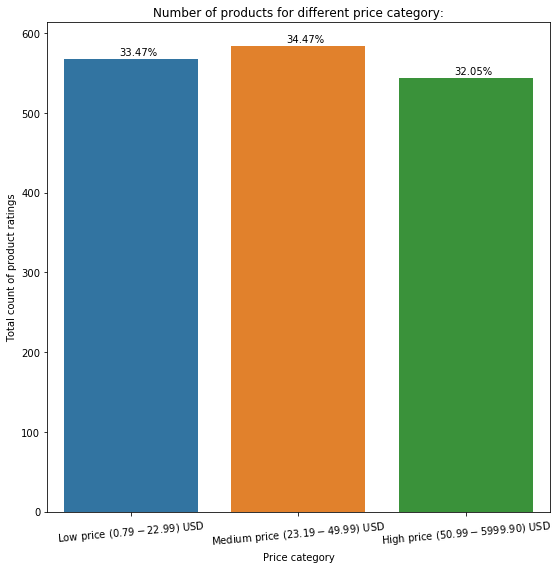

In [34]:
# b=pd.DataFrame(df[['1 star count', '2 star count', '3 star count', '4 star count',
#        '5 star count']].sum(),columns=['Total sales'])
fig,ax =plt.subplots(figsize=(9,9))
g=sns.countplot(data = df, x='Price_category', orient='h')
plt.title('Number of products for different price category:')
plt.xlabel('Price category')
plt.ylabel('Total count of product ratings')
#g.set_xticklabels(['1 star', '2 star', '3 star', '4 star', '5 star'])
for p in ax.patches:
    ax.annotate('{:.02f}%'.format(p.get_height()/df.shape[0]*100), (p.get_x()+0.33, p.get_height()+5))

#plt.xticks(rotate=45)
plt.xticks(rotation=5)
plt.show()


In [35]:
#df.drop(['1 star count','2 star count','3 star count','4 star count','5 star count'], axis=1, inplace=True)

### Sentiment analysis

In [36]:
df['Product name']

0       McFarlane'S Reserve Kentucky Straight Bourbon ...
1                          Jim Beam Bourbon Whiskey 1.75l
2                Skatterbrain Peanut Butter Whiskey 750ml
3                         Johnnie Walker Blue Label 750ml
4                                   Bulleit Bourbon 1.75l
                              ...                        
1689                     Johnnie Walker 18 Year Old 750ml
1690                    Glenlivet Founder'S Reserve 750ml
1691                 Russell'S Reserve 10yr Bourbon 750ml
1692                              Glenlivet 14 Year 750ml
1693                               Ardbeg Uigeadail 750ml
Name: Product name, Length: 1694, dtype: object

In [37]:
df.drop(872, inplace=True)

In [39]:
df[(df['recommendation_percent']==100) & (df['Final_sentiment']<=0.2) ][['Product name','Final_sentiment','recommendation_percent', 'Price_per_unit']]



,Product name,Final_sentiment,recommendation_percent,Price_per_unit
636,Dimensions Laphroaig 21yr 750ml,0.186310,100.0,799.90
937,Wilderness Trail Black Label Small Batch Bourb...,0.062008,100.0,39.99


Text(0.5, 0, 'Final sentiment score')

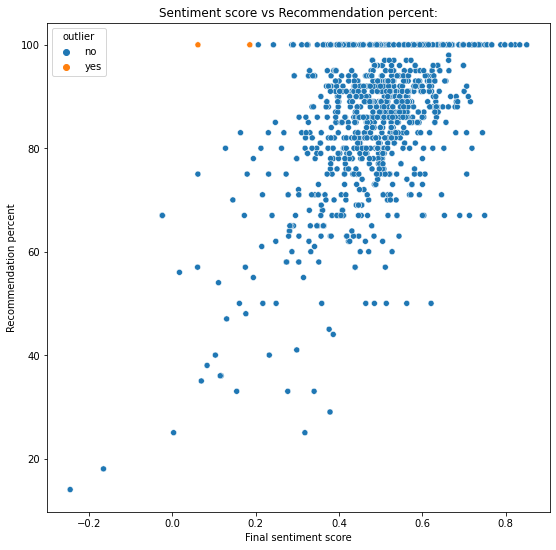

In [85]:
df['outlier'] = np.where((df['recommendation_percent']==100) & (df['Final_sentiment']<0.2), 'yes', 'no')
fig,ax =plt.subplots(figsize=(9,9))
sns.scatterplot(x = 'Final_sentiment', y = 'recommendation_percent', data = df, hue="outlier")
plt.title('Sentiment score vs Recommendation percent:')
plt.ylabel('Recommendation percent')
plt.xlabel('Final sentiment score')

In [86]:
# sns.relplot(x="Final_sentiment", y="recommendation_percent", data=df);
# plt.title('Sentiment score vs Recommendation percent:')
# plt.ylabel('Recommendation percent')
# plt.xlabel('Final sentiment score')
# plt.text(-0.275000,100,'This text starts at point (2,4)')

#### Positive sentiment:

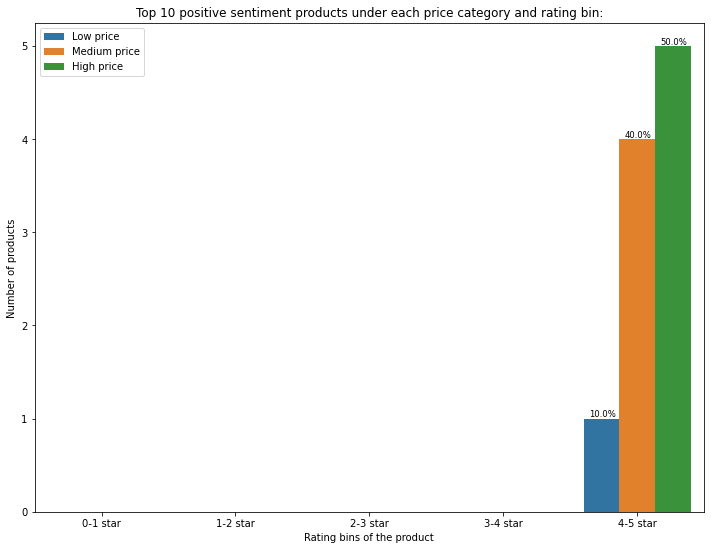

In [34]:

#b=pd.DataFrame(df[['BEER_SALES','WINE_SALES','SPIRITS_SALES','OTHERS_SALES']].sum(),columns=['Total sales'])
fig,ax =plt.subplots(figsize=(12,9))
sns.countplot(x=df[df['Final_sentiment']>0].dropna(subset=['Final_sentiment']).sort_values('Final_sentiment', ascending=False).head(10)['rating_bin'], hue=df[df['Final_sentiment']>0].dropna(subset=['Final_sentiment']).sort_values('Final_sentiment', ascending=False).head(10)['Price_category'])
plt.title('Top 10 positive sentiment products under each price category and rating bin:')
plt.xlabel('Rating bins of the product')
plt.ylabel('Number of products')

li=[]
for p in ax.patches:
    li.append(p.get_height())
li=np.array(li)
li[np.isnan(li)] = 0
    
s=[]
s.append(li[0]+li[5]+li[10])
s.append(li[1]+li[6]+li[11])
s.append(li[2]+li[7]+li[12])
s.append(li[3]+li[8]+li[13])
s.append(li[4]+li[9]+li[14])
c=-1
for p in ax.patches:
    c=c+1
    if(c==5):
        c=0
    ax.annotate('{:.01f}%'.format(p.get_height()/s[c]*100), (p.get_x()+0.04, p.get_height()+0.02), fontsize=8.5)
    
plt.legend(loc='upper left')
plt.show()


In [40]:
# df['rec_flag']=df['recommendation_percent'].isnull()

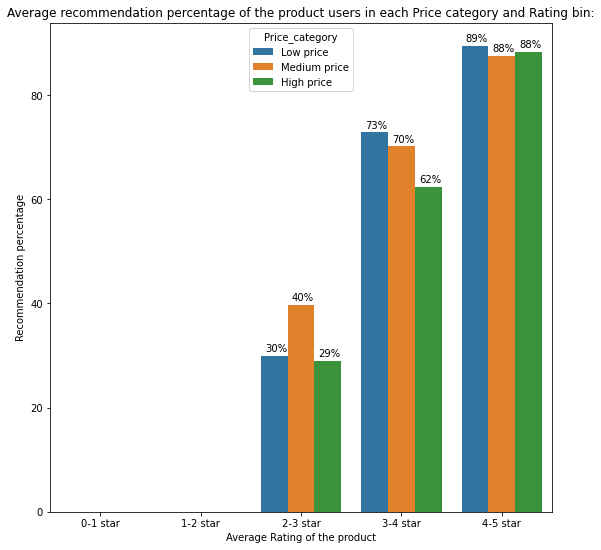

In [41]:
fig,ax =plt.subplots(figsize=(9,9))
sns.barplot(data=t, y='recommendation_percent',x='rating_bin', hue='Price_category' , ci=None)
plt.title('Average recommendation percentage of the product users in each Price category and Rating bin:')
plt.xlabel('Average Rating of the product')
plt.ylabel('Recommendation percentage')

for p in ax.patches:
    ax.annotate('{:.00f}%'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+0.8))


plt.show()


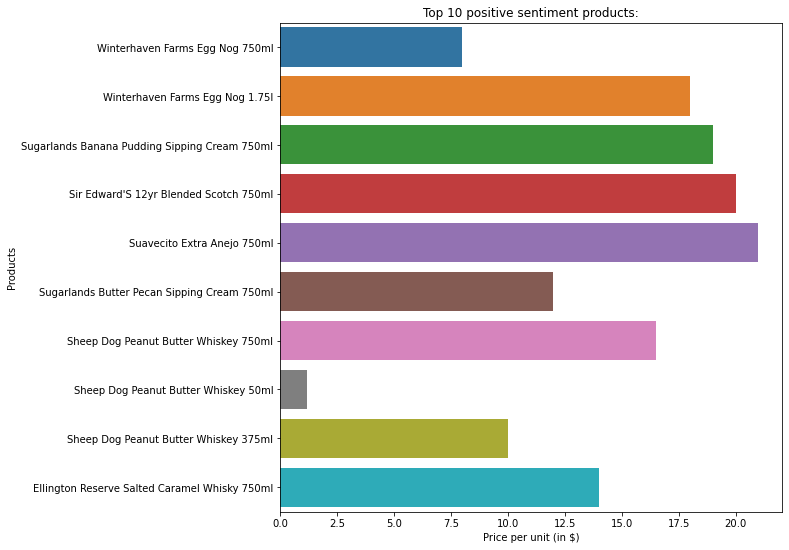

In [42]:
a=df[df['Review count']>35].sort_values('Final_sentiment', ascending=False).head(10)[['Product name','Price_per_unit']]
fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = a, x='Price_per_unit',y='Product name',orient='h')
plt.title('Top 10 positive sentiment products:')
plt.xlabel('Price per unit (in $)')
plt.ylabel('Products')



plt.show()


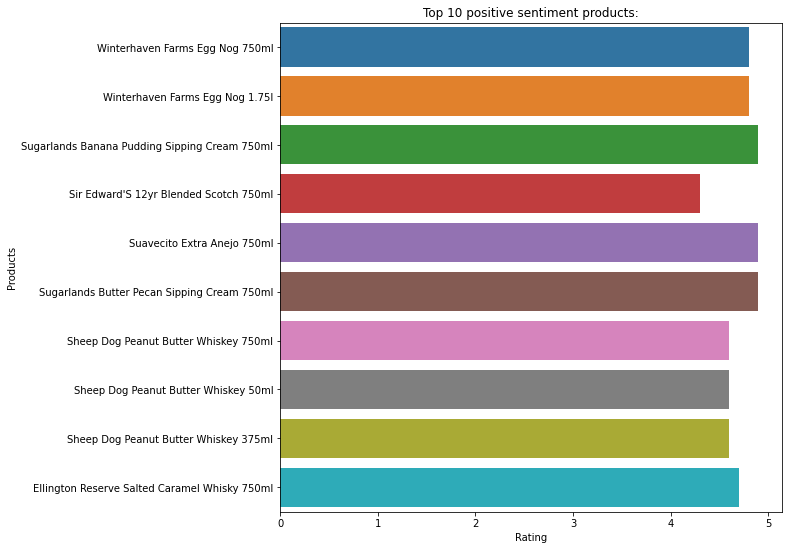

In [43]:
a=df[df['Review count']>35].sort_values('Final_sentiment', ascending=False).head(10)[['Product name','Rating']]
fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = a, x='Rating',y='Product name',orient='h')
plt.title('Top 10 positive sentiment products:')
plt.xlabel('Rating')
plt.ylabel('Products')



plt.show()


#### Negative sentiment:

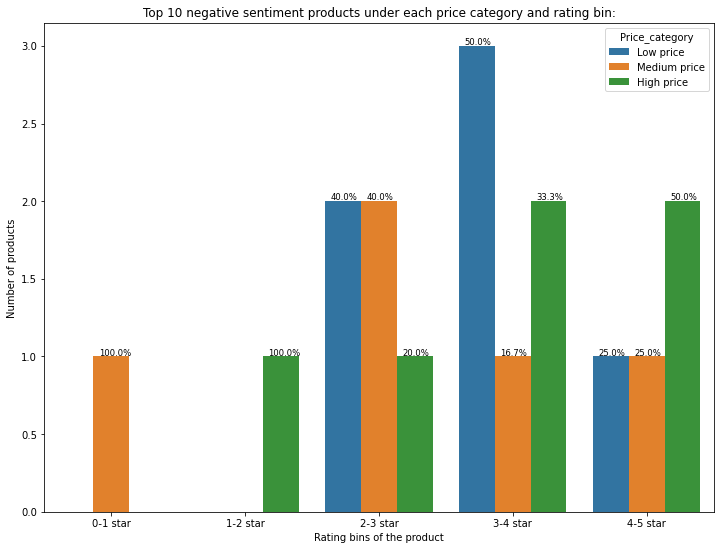

In [44]:

#b=pd.DataFrame(df[['BEER_SALES','WINE_SALES','SPIRITS_SALES','OTHERS_SALES']].sum(),columns=['Total sales'])
fig,ax =plt.subplots(figsize=(12,9))
sns.countplot(x=df[df['Final_sentiment']<0].dropna(subset=['Final_sentiment'])['rating_bin'], hue=df[df['Final_sentiment']<0].dropna(subset=['Final_sentiment'])['Price_category'])
plt.title('Top 10 negative sentiment products under each price category and rating bin:')
plt.xlabel('Rating bins of the product')
plt.ylabel('Number of products')

li=[]
for p in ax.patches:
    li.append(p.get_height())
li=np.array(li)
li[np.isnan(li)] = 0
    
s=[]
s.append(li[0]+li[5]+li[10])
s.append(li[1]+li[6]+li[11])
s.append(li[2]+li[7]+li[12])
s.append(li[3]+li[8]+li[13])
s.append(li[4]+li[9]+li[14])
c=-1
for p in ax.patches:
    c=c+1
    if(c==5):
        c=0
    ax.annotate('{:.01f}%'.format(p.get_height()/s[c]*100), (p.get_x()+0.04, p.get_height()+0.01), fontsize=8.5)
    

plt.show()


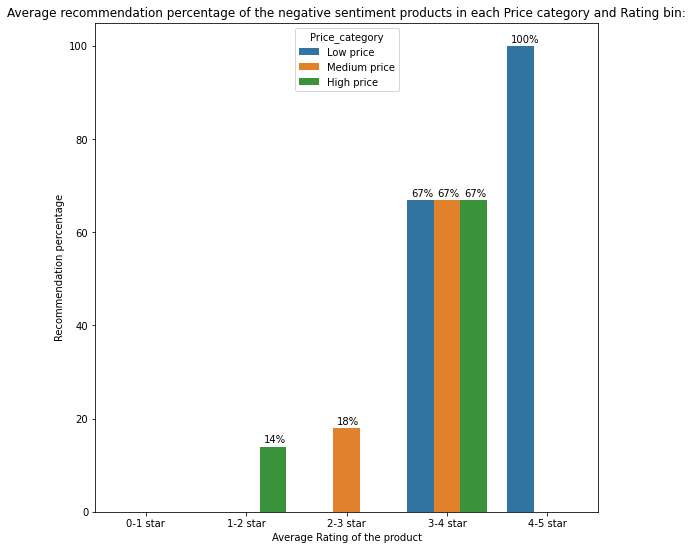

In [45]:
fig,ax =plt.subplots(figsize=(9,9))
sns.barplot(data=df[df['Final_sentiment']<0].dropna(subset=['Final_sentiment']), y='recommendation_percent',x='rating_bin', hue='Price_category' , ci=None)
plt.title('Average recommendation percentage of the negative sentiment products in each Price category and Rating bin:')
plt.xlabel('Average Rating of the product')
plt.ylabel('Recommendation percentage')

for p in ax.patches:
    ax.annotate('{:.00f}%'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+0.8))


plt.show()


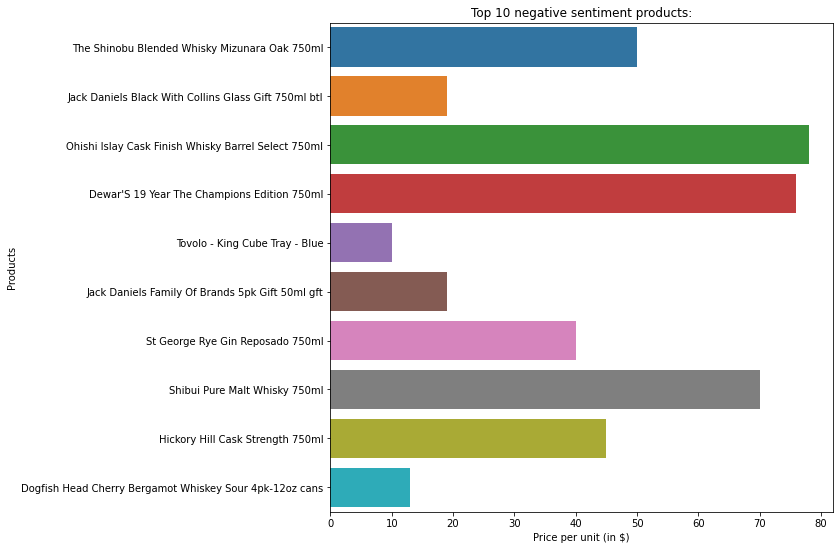

In [46]:
a=df[df['Final_sentiment']<0].sort_values('Final_sentiment').head(10)[['Product name','Price_per_unit']]
fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = a, x='Price_per_unit',y='Product name',orient='h')
plt.title('Top 10 negative sentiment products:')
plt.xlabel('Price per unit (in $)')
plt.ylabel('Products')



plt.show()


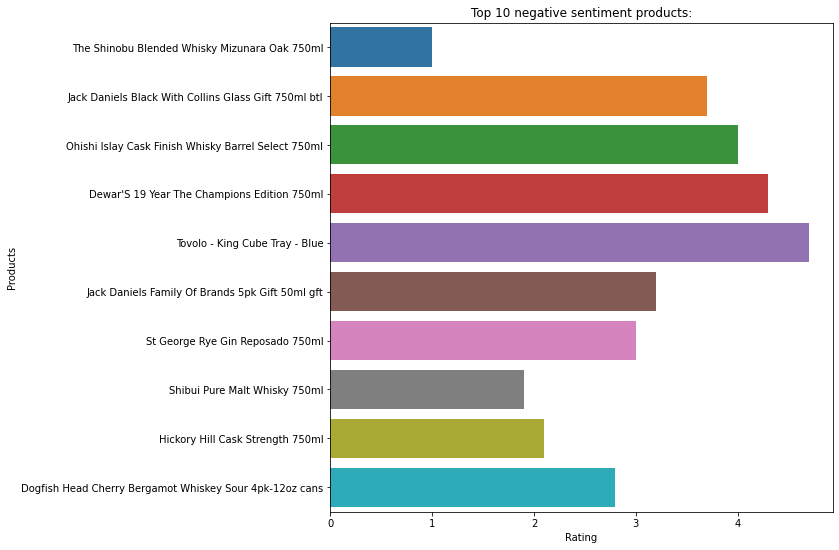

In [47]:
a=df[df['Final_sentiment']<0].sort_values('Final_sentiment').head(10)[['Product name','Rating']]
fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = a, x='Rating',y='Product name',orient='h')
plt.title('Top 10 negative sentiment products:')
plt.xlabel('Rating')
plt.ylabel('Products')



plt.show()


## PROS Analysis

In [48]:
df_pros=df.dropna(subset=['Pros']).reset_index(drop=True)

In [49]:
df_pros['Pros']

0       {'price': '29 reviews', 'value': '16 reviews',...
1       {'satisfaction': '48 reviews', 'price': '42 re...
2       {'satisfaction': '93 reviews', 'price': '27 re...
3                           {'satisfaction': '2 reviews'}
4       {'price': '48 reviews', 'satisfaction': '35 re...
                              ...                        
1188    {'satisfaction': '5 reviews', 'price': '2 revi...
1189    {'price': '30 reviews', 'satisfaction': '24 re...
1190     {'price': '6 reviews', 'enjoyment': '4 reviews'}
1191                        {'satisfaction': '2 reviews'}
1192    {'satisfaction': '16 reviews', 'appearance': '...
Name: Pros, Length: 1193, dtype: object

In [50]:
for i in range(df_pros.shape[0]):
    pros_list=list(json.loads(df_pros.loc[i,'Pros'].replace("'", "\"")).keys())
    df_pros.loc[i,'Pros1']=pros_list[0]
    try:
        df_pros.loc[i,'Pros2']=pros_list[1]
    except:
        df_pros.loc[i,'Pros2']=np.nan
    try:
        df_pros.loc[i,'Pros3']=pros_list[2]
    except:
        df_pros.loc[i,'Pros3']=np.nan
        

In [51]:
df_pros.isnull().sum()

Product name         0
Price_per_unit       0
Rating               0
Rating_count         0
1 star count         0
                  ... 
Price_category       0
Pros1                0
Cons1             1137
Pros2              285
Pros3              784
Length: 548, dtype: int64

In [52]:
df['Pros'].notnull().sum()

1193

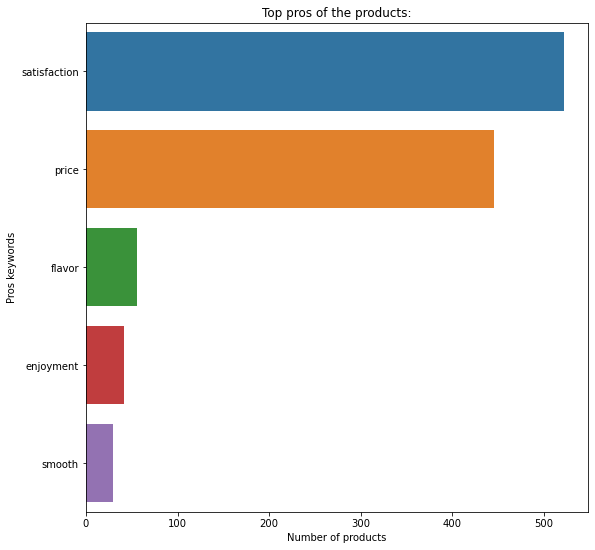

In [53]:
a=pd.DataFrame(df_pros['Pros1'].value_counts()).head(5)
fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = a, x='Pros1',y=a.index,orient='h')
plt.title('Top pros of the products:')
plt.xlabel('Number of products')
plt.ylabel('Pros keywords')



plt.show()


### Despite pro being "Price", price of some whiskey are very high: Rating dist

In [54]:
df_pros[df_pros['Pros1']=='price'].describe()['Price_per_unit']

count    445.000000
mean      33.558899
std       34.027405
min        0.790000
25%       16.990000
50%       25.490000
75%       39.990000
max      349.990000
Name: Price_per_unit, dtype: float64

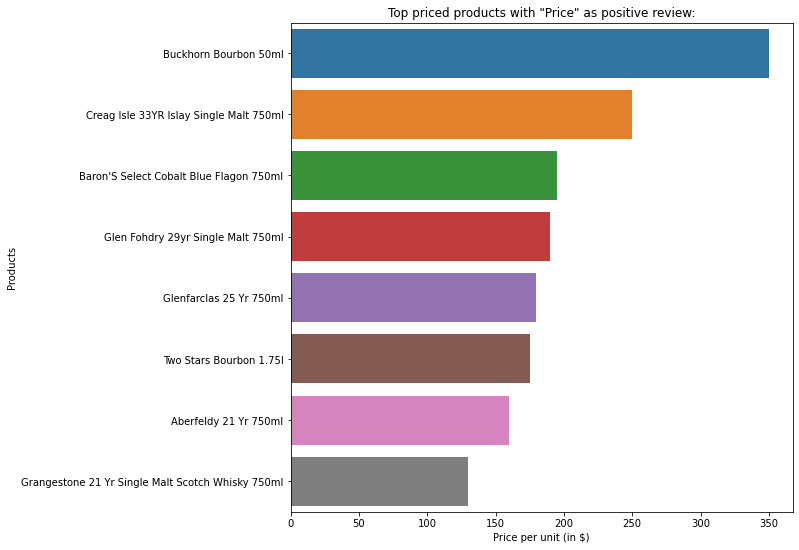

In [55]:
a=df_pros[(df_pros['Pros1']=='price') & (df_pros['Price_category']=='High price')].sort_values('Price_per_unit',ascending=False).head(10)[['Product name','Price_per_unit']]
fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = a, x='Price_per_unit',y='Product name',orient='h')
plt.title('Top priced products with "Price" as positive review:')
plt.xlabel('Price per unit (in $)')
plt.ylabel('Products')



plt.show()


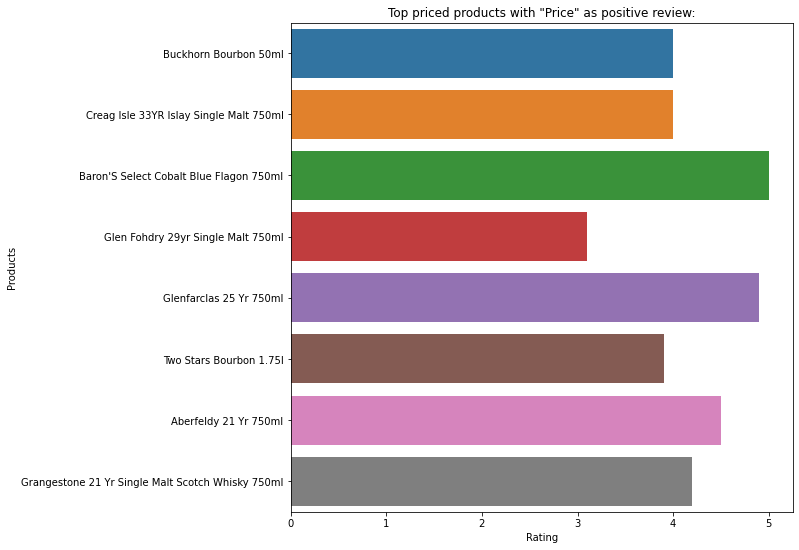

In [56]:
c=df_pros[(df_pros['Pros1']=='price') & (df_pros['Price_category']=='High price')].sort_values('Price_per_unit',ascending=False).head(10)[['Product name','Rating']]

fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = c, x='Rating',y='Product name',orient='h')
plt.title('Top priced products with "Price" as positive review:')
plt.xlabel('Rating')
plt.ylabel('Products')



plt.show()




In [57]:
d = {'recommendation_percent':'recommendation_percent_avg', 'recommendation_count':'total_recommendation_count'}
rec=df_pros.groupby('Pros1').agg({'recommendation_percent':'mean', 'recommendation_count':'sum'}).rename(columns=d)
# rec['total_recommendation_per']=rec['total_recommendation_count']/rec['total_recommendation_count'].sum()
# rec['Recommendation score']=rec['recommendation_percent_avg']*rec['total_recommendation_per']
d=rec.sort_values(by=['recommendation_percent_avg'],ascending=False)
d=d[d['total_recommendation_count']>50]
d=d.drop('smoothness')

In [58]:
d

,recommendation_percent_avg,total_recommendation_count
Pros1,,
comfort,95.000000,75.0
appearance,87.500000,51.0
enjoyment,86.428571,651.0
satisfaction,86.329502,22500.0
sweet,84.714286,56.0
price,83.766292,26283.0
smooth,83.206897,172.0
flavor,82.981818,357.0
taste,72.900000,52.0


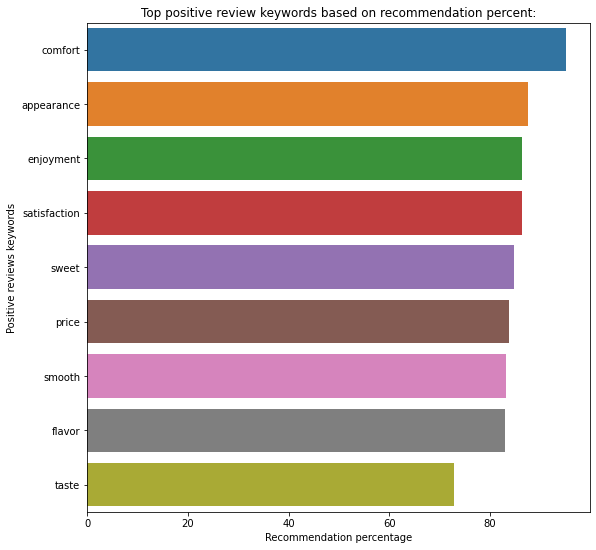

In [60]:
fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = d, x='recommendation_percent_avg',y=d.index,orient='h')
plt.title('Top positive review keywords based on recommendation percent:')
plt.xlabel('Recommendation percentage')
plt.ylabel('Positive reviews keywords')



plt.show()




### When pros was Value, then also avg_rating is 4.22 only and max_price is 39.99- Dist of rating (show avg on side)

In [61]:
valued=df_pros[(df_pros['Pros2']=='value')| (df_pros['Pros1']=='value') | (df_pros['Pros3']=='value')]

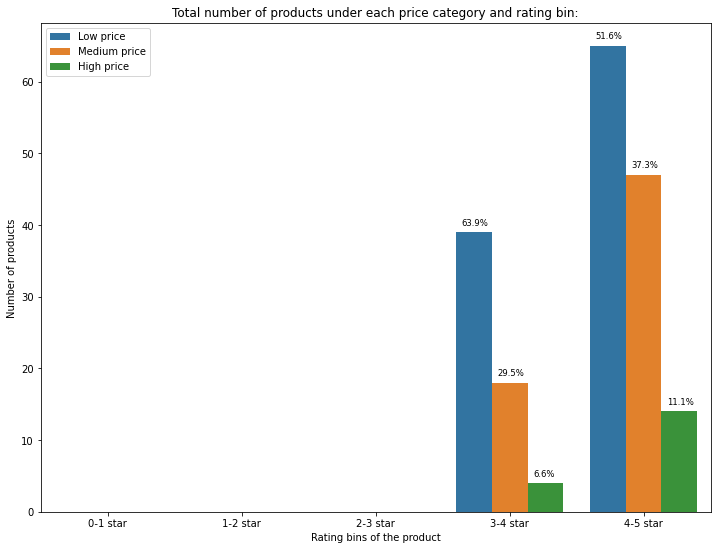

In [62]:
# valued[valued['5star_percent']<0.4]
#b=pd.DataFrame(df[['BEER_SALES','WINE_SALES','SPIRITS_SALES','OTHERS_SALES']].sum(),columns=['Total sales'])
fig,ax =plt.subplots(figsize=(12,9))
sns.countplot(x=valued['rating_bin'], hue=valued['Price_category'])
plt.title('Total number of products under each price category and rating bin:')
plt.xlabel('Rating bins of the product')
plt.ylabel('Number of products')

li=[]
for p in ax.patches:
    li.append(p.get_height())
li=np.array(li)
li[np.isnan(li)] = 0
    
s=[]
s.append(li[0]+li[5]+li[10])
s.append(li[1]+li[6]+li[11])
s.append(li[2]+li[7]+li[12])
s.append(li[3]+li[8]+li[13])
s.append(li[4]+li[9]+li[14])
c=-1
for p in ax.patches:
    c=c+1
    if(c==5):
        c=0
    ax.annotate('{:.01f}%'.format(p.get_height()/s[c]*100), (p.get_x()+0.04, p.get_height()+1), fontsize=8.5)
    
plt.legend(loc='upper left')
plt.show()


In [63]:
valued.describe()

,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,recommendation_count,recommendation_percent,...,509,510,511,1star_percent,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,170.000000,170.000000,170.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,12.000000
mean,28.606631,4.232620,163.310160,6.331551,5.941176,12.540107,42.122995,96.374332,73.882353,83.550802,...,0.024968,-0.051319,0.017955,0.049765,0.040334,0.089316,0.266927,0.553658,47.989305,4.166667
std,33.722822,0.334977,234.373289,10.512012,9.168774,16.243187,55.406619,164.674717,84.275451,9.359679,...,0.029142,0.012665,0.033357,0.051107,0.033375,0.048979,0.096295,0.153034,43.044737,1.992410
min,0.790000,3.200000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,58.000000,...,-0.065163,-0.069405,-0.064085,0.000000,0.000000,0.000000,0.000000,0.285714,2.000000,3.000000
25%,13.990000,4.000000,42.500000,1.000000,1.000000,4.000000,11.000000,23.000000,24.000000,78.000000,...,0.008225,-0.056458,-0.006669,0.017467,0.012899,0.052517,0.207447,0.427069,16.500000,3.000000
50%,20.990000,4.300000,82.000000,3.000000,3.000000,8.000000,25.000000,42.000000,42.000000,86.000000,...,0.037453,-0.052565,0.030282,0.034965,0.035088,0.088235,0.255319,0.531469,34.000000,3.000000
75%,35.990000,4.500000,167.000000,8.000000,8.000000,15.000000,47.500000,95.500000,93.000000,90.500000,...,0.047613,-0.049460,0.046070,0.061538,0.060976,0.119406,0.326861,0.670611,65.500000,5.000000
max,349.990000,5.000000,1298.000000,73.000000,57.000000,94.000000,281.000000,943.000000,475.000000,100.000000,...,0.059613,0.039408,0.058448,0.262069,0.142857,0.272727,0.666667,1.000000,209.000000,9.000000


### Satisfied product analysis

In [64]:
satisfied=df_pros[(df_pros['Pros2']=='satisfaction')| (df_pros['Pros1']=='satisfaction') | (df_pros['Pros3']=='satisfaction')]

In [65]:
# satisfied[satisfied['Price_per_unit']>200]

In [66]:
#satisfied[(satisfied['Price_per_unit']<10)& (satisfied['Rating']>4.6)]

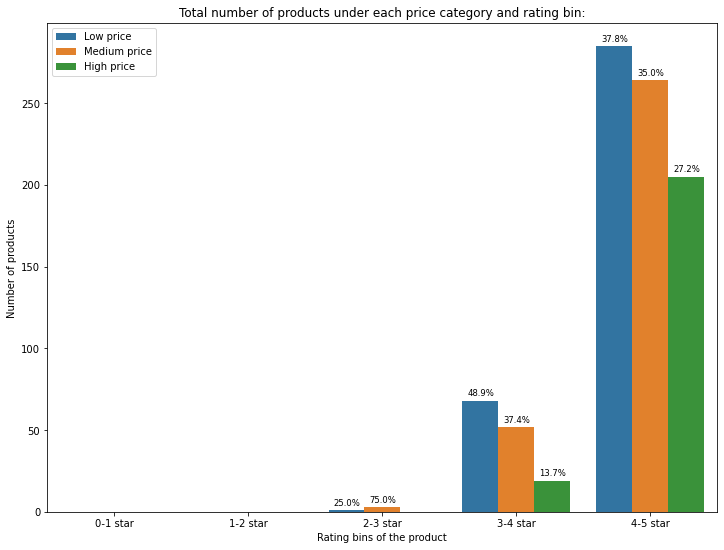

In [67]:
#b=pd.DataFrame(df[['BEER_SALES','WINE_SALES','SPIRITS_SALES','OTHERS_SALES']].sum(),columns=['Total sales'])
fig,ax =plt.subplots(figsize=(12,9))
sns.countplot(x=satisfied['rating_bin'], hue=satisfied['Price_category'])
plt.title('Total number of products under each price category and rating bin:')
plt.xlabel('Rating bins of the product')
plt.ylabel('Number of products')

li=[]
for p in ax.patches:
    li.append(p.get_height())
li=np.array(li)
li[np.isnan(li)] = 0
    
s=[]
s.append(li[0]+li[5]+li[10])
s.append(li[1]+li[6]+li[11])
s.append(li[2]+li[7]+li[12])
s.append(li[3]+li[8]+li[13])
s.append(li[4]+li[9]+li[14])
c=-1
for p in ax.patches:
    c=c+1
    if(c==5):
        c=0
    ax.annotate('{:.01f}%'.format(p.get_height()/s[c]*100), (p.get_x()+0.04, p.get_height()+3), fontsize=8.5)
    
plt.legend(loc='upper left')
plt.show()


In [68]:
satisfied.describe()

,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,recommendation_count,recommendation_percent,...,509,510,511,1star_percent,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,...,806.000000,806.000000,806.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,52.000000
mean,46.474950,4.436343,242.935340,5.454849,4.625418,13.856187,43.257525,175.741360,51.085842,85.715719,...,0.009904,-0.043686,0.003897,0.042429,0.030824,0.060801,0.180361,0.685585,33.933110,4.692308
std,94.846875,0.357189,745.173732,10.732670,11.024331,47.508675,133.958205,549.977755,70.926399,10.878823,...,0.032526,0.021674,0.038160,0.060279,0.037541,0.048362,0.102231,0.159089,46.533542,3.090393
min,0.790000,2.100000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,...,-0.069642,-0.074724,-0.086905,0.000000,0.000000,0.000000,0.000000,0.210526,2.000000,3.000000
25%,16.990000,4.300000,25.000000,0.000000,0.000000,1.000000,4.000000,15.000000,13.000000,80.000000,...,-0.014319,-0.055378,-0.031361,0.000000,0.000000,0.027523,0.107143,0.575758,8.000000,3.000000
50%,29.990000,4.500000,53.000000,2.000000,1.000000,3.000000,10.000000,35.000000,25.000000,88.000000,...,0.015956,-0.050617,0.008570,0.025180,0.017857,0.050955,0.166667,0.716418,16.000000,3.000000
75%,49.990000,4.700000,172.000000,6.000000,4.000000,9.000000,28.000000,122.000000,60.000000,93.000000,...,0.038644,-0.041572,0.039940,0.053571,0.046154,0.093502,0.244898,0.806452,39.000000,6.000000
max,1699.900000,5.000000,7302.000000,87.000000,107.000000,488.000000,1349.000000,5290.000000,526.000000,100.000000,...,0.057750,0.063451,0.068949,0.647059,0.250000,0.250000,0.615385,1.000000,332.000000,18.000000


### Enjoyment

In [69]:
enjoyed=df_pros[(df_pros['Pros2']=='enjoyment')| (df_pros['Pros1']=='enjoyment') | (df_pros['Pros3']=='enjoyment')]

In [70]:
# enjoyed[enjoyed['Price_category']=='High price']

# #Dist of enjoyment in bar plot acc to Price_category

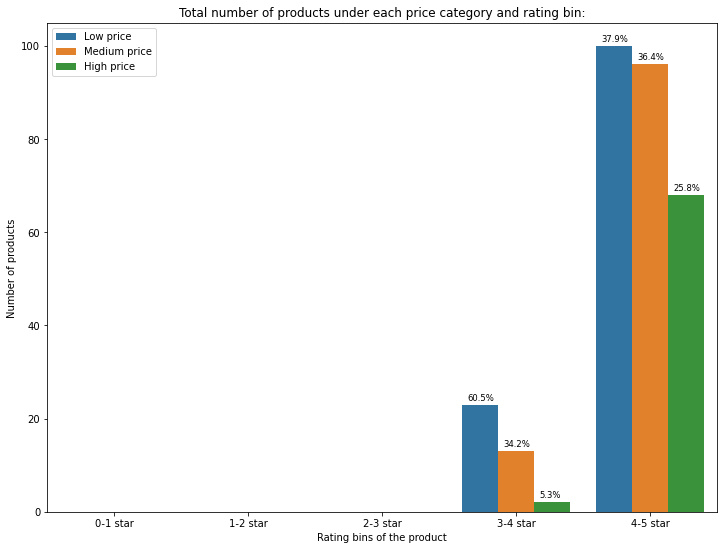

In [71]:
#b=pd.DataFrame(df[['BEER_SALES','WINE_SALES','SPIRITS_SALES','OTHERS_SALES']].sum(),columns=['Total sales'])
fig,ax =plt.subplots(figsize=(12,9))
sns.countplot(x=enjoyed['rating_bin'], hue=enjoyed['Price_category'])
plt.title('Total number of products under each price category and rating bin:')
plt.xlabel('Rating bins of the product')
plt.ylabel('Number of products')

li=[]
for p in ax.patches:
    li.append(p.get_height())
li=np.array(li)
li[np.isnan(li)] = 0
    
s=[]
s.append(li[0]+li[5]+li[10])
s.append(li[1]+li[6]+li[11])
s.append(li[2]+li[7]+li[12])
s.append(li[3]+li[8]+li[13])
s.append(li[4]+li[9]+li[14])
c=-1
for p in ax.patches:
    c=c+1
    if(c==5):
        c=0
    ax.annotate('{:.01f}%'.format(p.get_height()/s[c]*100), (p.get_x()+0.04, p.get_height()+1), fontsize=8.5)
    
plt.legend(loc='upper left')
plt.show()


## CONS Analysis: Nothing significant

In [72]:
df_cons=df.dropna(subset=['Cons']).reset_index(drop=True)

In [73]:
for i in range(df_cons.shape[0]):
    cons_list=list(json.loads(df_cons.loc[i,'Cons'].replace("'", "\"")).keys())
    df_cons.loc[i,'Cons1']=cons_list[0]
    try:
        df_cons.loc[i,'Cons2']=cons_list[1]
    except:
        df_cons.loc[i,'Cons2']=np.nan
    try:
        df_cons.loc[i,'Cons3']=cons_list[2]
    except:
        df_cons.loc[i,'Cons3']=np.nan
        

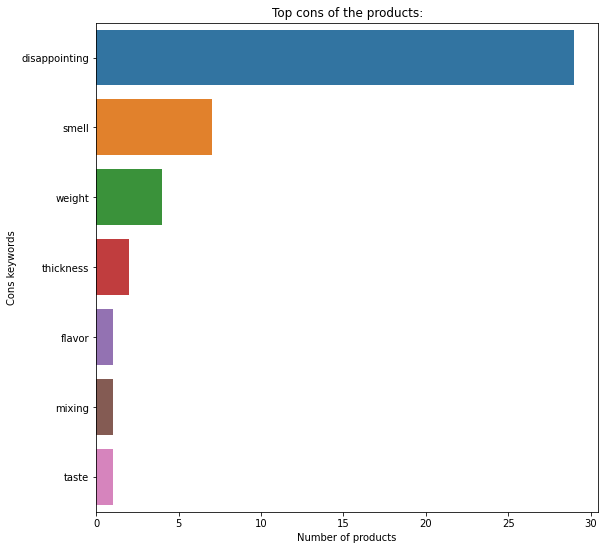

In [74]:
a=pd.DataFrame(df_cons['Cons1'].value_counts()).drop('price')
fig,ax =plt.subplots(figsize=(9,9))
g=sns.barplot(data = a, x='Cons1',y=a.index,orient='h')
plt.title('Top cons of the products:')
plt.xlabel('Number of products')
plt.ylabel('Cons keywords')



plt.show()


In [75]:
df_cons.describe()

,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,recommendation_count,recommendation_percent,...,509,510,511,1star_percent,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,50.000000,50.000000,50.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,33.238393,4.067857,243.142857,17.642857,10.785714,17.875000,52.071429,144.767857,145.017857,76.089286,...,0.025037,-0.051583,0.000189,0.103003,0.056879,0.072639,0.196200,0.571278,61.303571,4.946429
std,29.198597,0.507796,200.283293,17.633056,11.266546,19.933583,50.215122,139.792833,145.015045,13.983467,...,0.027716,0.005456,0.036759,0.105270,0.041442,0.040087,0.084978,0.174635,53.963260,3.579841
min,0.990000,2.700000,12.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,35.000000,...,-0.049544,-0.067386,-0.051023,0.000000,0.000000,0.000000,0.000000,0.230769,3.000000,3.000000
25%,14.990000,3.675000,64.250000,5.000000,4.000000,4.000000,10.000000,32.500000,28.000000,66.500000,...,0.001092,-0.055275,-0.037793,0.034858,0.027322,0.040509,0.133234,0.443878,11.750000,3.000000
50%,25.990000,4.200000,183.000000,13.000000,6.500000,11.000000,40.000000,111.000000,105.000000,80.000000,...,0.038108,-0.050850,0.006350,0.055556,0.042403,0.065045,0.196721,0.561333,56.000000,3.000000
75%,44.990000,4.500000,392.000000,23.000000,15.000000,22.000000,89.000000,198.000000,246.000000,89.000000,...,0.047843,-0.048584,0.034125,0.142439,0.081081,0.100236,0.282686,0.726282,75.000000,6.000000
max,159.900000,4.700000,668.000000,73.000000,57.000000,94.000000,202.000000,524.000000,526.000000,95.000000,...,0.051883,-0.034319,0.051226,0.454545,0.200000,0.166667,0.326861,0.852273,209.000000,19.000000


In [78]:
# disappointing=df_cons[(df_cons['Cons1']=='price')| (df_cons['Cons2']=='price') | (df_cons['Cons3']=='price')]




In [77]:
# #b=pd.DataFrame(df[['BEER_SALES','WINE_SALES','SPIRITS_SALES','OTHERS_SALES']].sum(),columns=['Total sales'])
# fig,ax =plt.subplots(figsize=(12,9))
# sns.countplot(x=df_cons['rating_bin'], hue=df_cons['Price_category'])
# plt.title('Total number of products under each price category and rating bin:')
# plt.xlabel('Rating bins of the product')
# plt.ylabel('Number of products')

# li=[]
# for p in ax.patches:
#     li.append(p.get_height())
# li=np.array(li)
# li[np.isnan(li)] = 0
    
# s=[]
# s.append(li[0]+li[5]+li[10])
# s.append(li[1]+li[6]+li[11])
# s.append(li[2]+li[7]+li[12])
# s.append(li[3]+li[8]+li[13])
# s.append(li[4]+li[9]+li[14])
# c=-1
# for p in ax.patches:
#     c=c+1
#     if(c==5):
#         c=0
#     ax.annotate('{:.01f}%'.format(p.get_height()/s[c]*100), (p.get_x()+0.04, p.get_height()+1), fontsize=8.5)
    
# plt.legend(loc='upper left')

# plt.show()


### Predicted conclusion

In [104]:
test=pd.read_csv('test_data_level3.csv')

In [105]:
test['recommendation_percent'].mean()

84.90229885057471

In [106]:
test['recommendation_prediction'].mean()

84.36345616091953

In [107]:
test

,Price_per_unit,rating,Rating_count,recommendation_percent,recommendation_prediction
0,39.99,4.3,138,76,79.463480
1,36.99,4.5,17,100,77.403400
2,39.99,3.6,49,60,60.671177
3,19.99,4.8,32,100,79.637930
4,35.99,4.3,6,67,82.956980
...,...,...,...,...,...
343,1.49,3.7,20,78,76.155010
344,56.99,4.6,22,92,88.541435
345,15.99,4.4,25,100,99.833020
346,13.49,4.8,223,94,93.972720


In [108]:
bins = [ 2, 3, 4, 5 ]
labels=['2-3 star','3-4 star', '4-5 star']
test['rating_bin'] = pd.cut(test['rating'] , bins=bins, labels=labels, include_lowest=True)

In [109]:
test['rating_bin'].value_counts()

4-5 star    285
3-4 star     60
2-3 star      3
Name: rating_bin, dtype: int64

In [110]:
bins = np.linspace(test['Price_per_unit'].min(),test['Price_per_unit'].max(),4)
labels=['Low price','Medium price','High price']
test['Price_category'] = pd.qcut(test['Price_per_unit'], q=3, precision=1, labels=labels)

In [111]:
test[test['rating_bin']=='1-2 star']

,Price_per_unit,rating,Rating_count,recommendation_percent,recommendation_prediction,rating_bin,Price_category


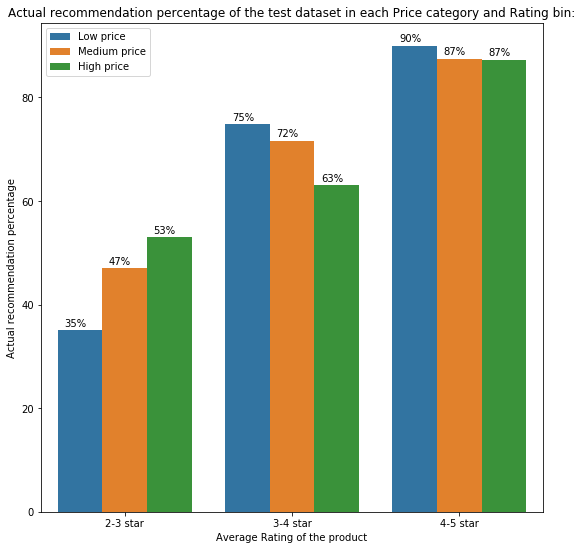

In [112]:
fig,ax =plt.subplots(figsize=(9,9))
sns.barplot(data = test, y='recommendation_percent',x='rating_bin', hue='Price_category' , ci=None)
plt.title('Actual recommendation percentage of the test dataset in each Price category and Rating bin:')
plt.xlabel('Average Rating of the product')
plt.ylabel('Actual recommendation percentage')

for p in ax.patches:
    ax.annotate('{:.00f}%'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+0.8))

plt.legend(loc='upper left')
plt.show()


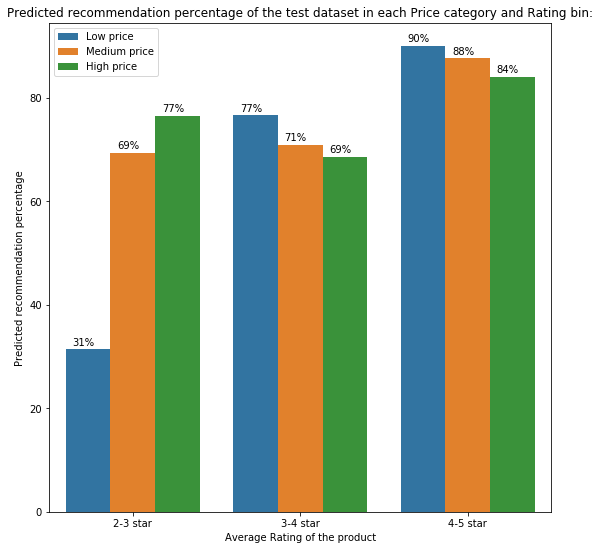

In [113]:
fig,ax =plt.subplots(figsize=(9,9))
sns.barplot(data = test, y='recommendation_prediction',x='rating_bin', hue='Price_category' , ci=None)
plt.title('Predicted recommendation percentage of the test dataset in each Price category and Rating bin:')
plt.xlabel('Average Rating of the product')
plt.ylabel('Predicted recommendation percentage')

for p in ax.patches:
    ax.annotate('{:.00f}%'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+0.8))

plt.legend(loc='upper left')
plt.show()


In [83]:
t[t['rating_bin']=='2-3 star']

,Product name,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Similar_product_1,...,511,1star_percent,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count,rating_bin,Price_category
86,Ritual Zero Proof Non-Alcoholic Whiskey 750ml,24.99,2.7,117,53,7,11,19,27,Ritual Zero Proof Non-Alcoholic Gin 750ml,...,-0.048975,0.452991,0.059829,0.094017,0.162393,0.230769,8.0,18.0,2-3 star,Medium price ($23.19-$49.99) USD
88,Rogue Dead Guy Whiskey 750ml,37.99,3.0,18,6,3,0,3,6,Oregon Spirit Straight Bourbon 750ml,...,0.018497,0.333333,0.166667,0.000000,0.166667,0.333333,2.0,NaN,2-3 star,Medium price ($23.19-$49.99) USD
524,Hickory Hill Cask Strength 750ml,44.99,2.1,47,30,3,2,4,8,Bib & Tucker 6 Year Bourbon 750ml,...,0.031040,0.638298,0.063830,0.042553,0.085106,0.170213,6.0,NaN,2-3 star,Medium price ($23.19-$49.99) USD
595,Giant TX Bourbon Black 750ml,17.99,2.7,22,10,2,0,4,6,Krova Vodka 750ml,...,-0.033651,0.454545,0.090909,0.000000,0.181818,0.272727,5.0,19.0,2-3 star,Low price ($0.79-$22.99) USD
668,Singletree Small Batch Bourbon 750ml,26.99,2.8,22,6,5,3,3,5,NaN,...,-0.038203,0.272727,0.227273,0.136364,0.136364,0.227273,2.0,NaN,2-3 star,Medium price ($23.19-$49.99) USD
680,Giant TX Bourbon 91 Proof Gold 750ml,18.99,2.1,17,11,1,1,0,4,NaN,...,0.055245,0.647059,0.058824,0.058824,0.000000,0.235294,8.0,NaN,2-3 star,Low price ($0.79-$22.99) USD
792,Bent Wing Brandy 750ml,29.99,3.0,4,1,1,0,1,1,Bormioli Elixer DOF 4pk,...,0.032857,0.250000,0.250000,0.000000,0.250000,0.250000,3.0,NaN,2-3 star,Medium price ($23.19-$49.99) USD
1226,"Macallan ""M"" Crystal Decanter 750ml",5999.90,2.9,7,3,0,1,1,2,Blue Vin Riesling 750ml,...,-0.048053,0.428571,0.000000,0.142857,0.142857,0.285714,4.0,NaN,2-3 star,High price ($50.99-$5999.90) USD
1228,"Macallan ""M"" Crystal Decanter 750ml",5999.90,2.9,7,3,0,1,1,2,Blue Vin Riesling 750ml,...,-0.048053,0.428571,0.000000,0.142857,0.142857,0.285714,4.0,NaN,2-3 star,High price ($50.99-$5999.90) USD
1633,Smooth Ambler Big Level Wheated Bourbon 750ml,119.99,2.9,17,8,0,1,1,7,Redemption Wheated Bourbon 750ml,...,NaN,0.470588,0.000000,0.058824,0.058824,0.411765,10.0,NaN,2-3 star,High price ($50.99-$5999.90) USD


In [41]:
t=df[df['recommendation_percent'].notnull()]

In [47]:
t.shape

(1191, 554)

In [48]:
t

,Product name,Price_per_unit,Rating,Rating_count,1 star count,2 star count,3 star count,4 star count,5 star count,Similar_product_1,...,511,1star_percent,2star_percent,3star_percent,4star_percent,5star_percent,pros_count,cons_count,rating_bin,Price_category
0,McFarlane'S Reserve Kentucky Straight Bourbon ...,36.99,3.8,146,9,18,17,47,55,First Call Kentucky Straight Bourbon 1.75L,...,0.043817,0.061644,0.123288,0.116438,0.321918,0.376712,58.0,NaN,3-4 star,Medium price ($23.19-$49.99) USD
1,Jim Beam Bourbon Whiskey 1.75l,18.99,4.6,471,7,7,24,72,361,Tower Vodka 1.75L,...,0.032752,0.014862,0.014862,0.050955,0.152866,0.766454,105.0,NaN,4-5 star,Low price ($0.79-$22.99) USD
2,Skatterbrain Peanut Butter Whiskey 750ml,15.99,4.4,436,22,20,21,73,300,Skatterbrain Dark Chocolate Banana Whiskey 750ml,...,-0.049115,0.050459,0.045872,0.048165,0.167431,0.688073,129.0,NaN,4-5 star,Low price ($0.79-$22.99) USD
3,Johnnie Walker Blue Label 750ml,194.90,4.7,772,11,9,36,101,615,Chivas Royal Salute 21 Yr 750ml,...,-0.042576,0.014249,0.011658,0.046632,0.130829,0.796632,2.0,NaN,4-5 star,High price ($50.99-$5999.90) USD
4,Bulleit Bourbon 1.75l,35.99,4.6,1297,7,14,53,281,942,Redemption Wheated Bourbon 750ml,...,0.046938,0.005397,0.010794,0.040864,0.216654,0.726291,100.0,NaN,4-5 star,Medium price ($23.19-$49.99) USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Johnnie Walker 18 Year Old 750ml,99.99,4.6,35,1,1,0,6,27,Dalmore 12 Year Sherry Cask Select 750ml,...,NaN,0.028571,0.028571,0.000000,0.171429,0.771429,7.0,NaN,4-5 star,High price ($50.99-$5999.90) USD
1690,Glenlivet Founder'S Reserve 750ml,30.99,4.6,216,7,1,7,49,152,Shieldaig Speyside Single Malt 12Yr 750ml,...,NaN,0.032407,0.004630,0.032407,0.226852,0.703704,54.0,NaN,4-5 star,Medium price ($23.19-$49.99) USD
1691,Russell'S Reserve 10yr Bourbon 750ml,33.99,4.6,55,0,0,1,22,32,Wolcott Kentucky Straight Bourbon 750ml,...,NaN,0.000000,0.000000,0.018182,0.400000,0.581818,10.0,NaN,4-5 star,Medium price ($23.19-$49.99) USD
1692,Glenlivet 14 Year 750ml,46.99,4.7,48,0,1,3,7,37,Smokehead High Voltage Whisky 750ml,...,NaN,0.000000,0.020833,0.062500,0.145833,0.770833,2.0,NaN,4-5 star,Medium price ($23.19-$49.99) USD
